In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
car_data = pd.read_csv('Cardetails.csv')

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
car_data.drop(columns=['torque'], inplace=True)

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
car_data.shape

(8128, 12)

In [ ]:
#preprocessing

In [ ]:
#NULL Check

In [ ]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [ ]:
car_data.dropna(inplace=True)

In [ ]:
car_data.shape

(7907, 12)

In [ ]:
#Duplicate Check

In [ ]:
car_data.duplicated().sum()

1189

In [ ]:
car_data.drop_duplicates(inplace=True)

In [ ]:
car_data.shape

(6718, 12)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [ ]:
Fuel_type = car_data['fuel']
Seller_type = car_data['seller_type']
Transmission_type = car_data['transmission']
Selling_price = car_data['selling_price']

In [ ]:
from matplotlib import style

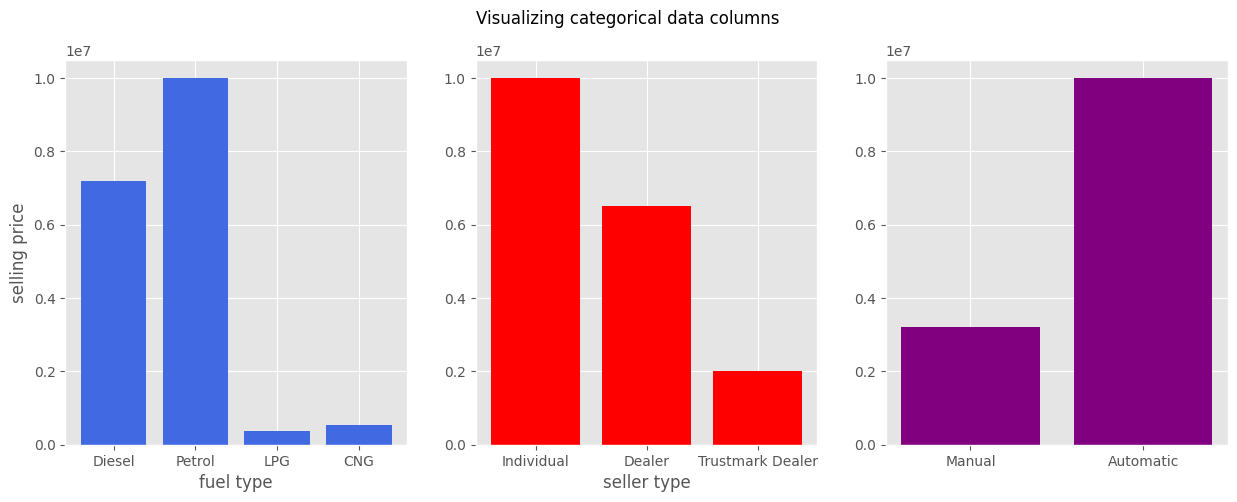

In [ ]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(Fuel_type,Selling_price,color='royalblue')
plt.xlabel("fuel type")
plt.ylabel("selling price")
plt.subplot(1,3,2)
plt.bar(Seller_type,Selling_price,color='red')
plt.xlabel("seller type")
plt.subplot(1,3,3)
plt.bar(Transmission_type,Selling_price,color='purple')
plt.show()

<Axes: xlabel='transmission', ylabel='selling_price'>

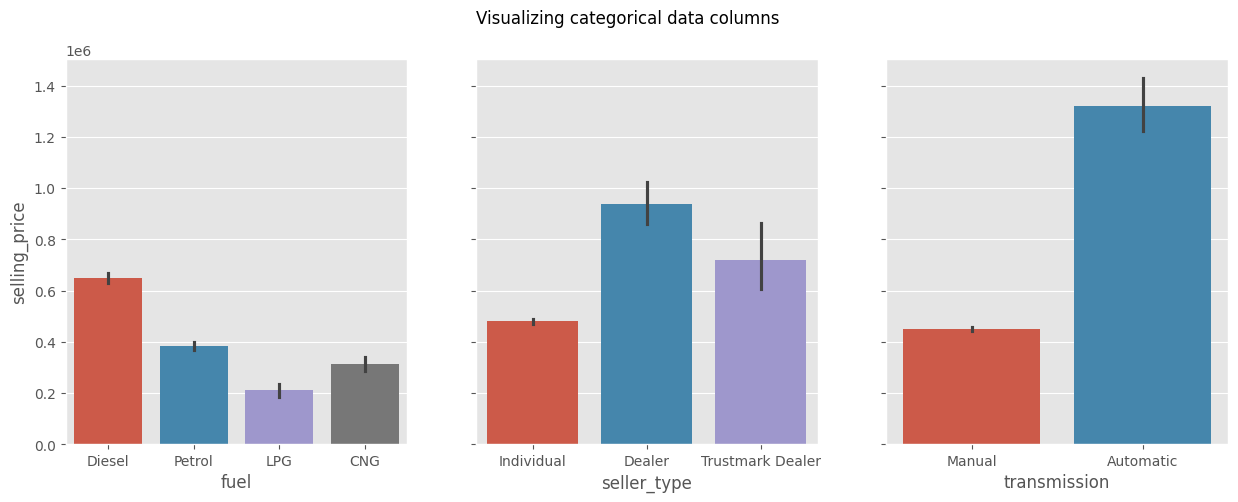

In [ ]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Visualizing categorical data columns')

sns.barplot(x=Fuel_type, y=Selling_price, hue=Fuel_type, ax=axes[0])
sns.barplot(x=Seller_type, y=Selling_price, hue=Seller_type, ax=axes[1])
sns.barplot(x=Transmission_type, y=Selling_price, hue=Transmission_type, ax=axes[2])


In [ ]:
#Data Analysis

In [ ]:
for col in car_data.columns:
    print('Unique values of ' +col)
    print(car_data[col].unique())
    print("=======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [ ]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [ ]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [ ]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [ ]:
car_data['name'] = car_data['name'].apply(get_brand_name)

In [ ]:
car_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [ ]:
car_data['mileage'] = car_data['mileage'].apply(clean_data)

In [ ]:
car_data['max_power'] = car_data['max_power'].apply(clean_data)

In [ ]:
car_data['engine'] = car_data['engine'].apply(clean_data)

In [ ]:
for col in car_data.columns:
    print('Unique values of ' +col)
    print(car_data[col].unique())
    print("=======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [ ]:
car_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                         [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                         ,inplace=True)

In [ ]:
car_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
car_data['transmission'].replace(['Manual', 'Automatic'],[0,1],inplace=True)

In [ ]:
car_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
car_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[0,1,2],inplace=True)

In [ ]:
car_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
car_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[0,1,2,3],inplace=True)

In [ ]:
car_data.reset_index(inplace=True)

In [ ]:
car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,1,0,0,1,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,0,0,0,1,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,1,0,0,0,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,0,0,0,3,16.80,1493.0,110.00,5.0


In [ ]:
car_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
car_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],[0,1,2,3,4],inplace=True)

In [ ]:
car_data.drop(columns=['index'],inplace=True)

In [ ]:
car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,1,0,0,1,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,0,0,0,1,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,1,0,0,0,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,0,0,0,3,16.80,1493.0,110.00,5.0


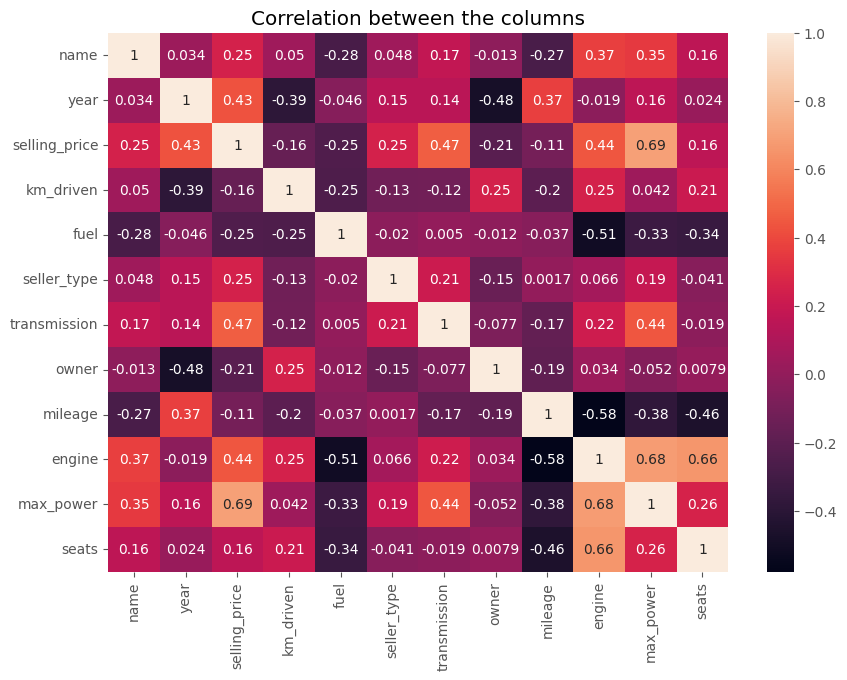

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
input_data = car_data.drop(columns=['selling_price'])
output_data = car_data['selling_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2)

In [ ]:
#model creation

In [ ]:
model = LinearRegression()

In [ ]:
#train model

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict

array([122514.21609943, 557468.2567835 , 601143.34484001, ...,
       -96252.80367239, 373059.35173452, 317332.9828862 ])

In [ ]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3397,4,2013,58609,1,0,0,1,21.1,814.0,55.2,5.0


In [ ]:
input_data_model = pd.DataFrame(
    [[6,2016,11000,0,0,0,3,17.8,1248.0,75.0,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']
)

In [ ]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,2016,11000,0,0,0,3,17.8,1248.0,75.0,5.0


In [ ]:
model.predict(input_data_model)

array([464258.42189075])

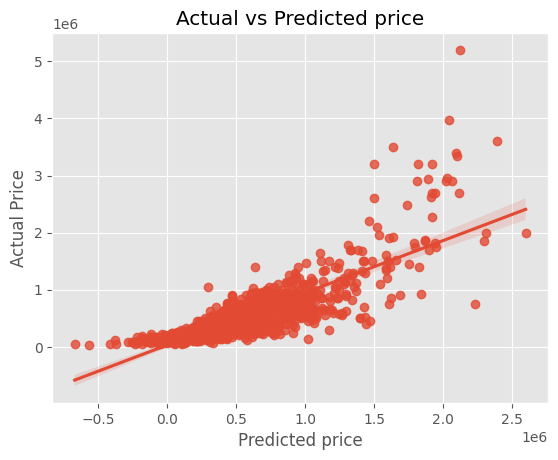

In [ ]:
sns.regplot(x=predict, y=y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted price")
plt.show()